# Observable Trends - Pyber

The following trends can be seen from the data below:
1. The highest average fares are found in rural cities.  Unfortunately, the lowest number of rides is also found in rural cities.
2. The highest number of rides taken is found in urban cities.  The fares are generally low which indicate that the rides are short.  In addition, the highest percentage of Pyber drivers is found in urban cities indicating that there is a high level of competition.
3. Suburban drivers take less than rides than urban drivers and earn more per ride on average.  One could conclude that, to make the most per ride while saving wear and tear on your vehicle, driving in a suburban city might be preferred.

In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv('data/ride_data.csv')

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data,how='outer',on='city')

# Display the data table for preview
combined_data.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

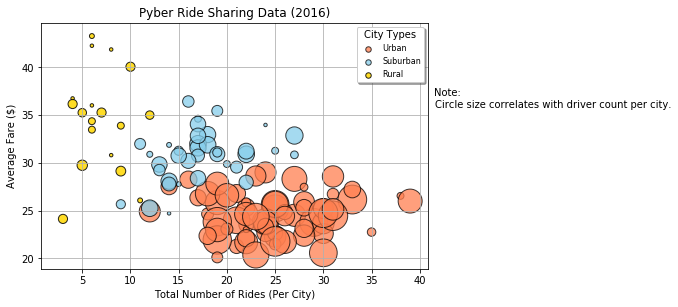

In [8]:
# Obtain the x and y coordinates for each of the three city types
urban_data = combined_data.loc[combined_data['type']=="Urban"]
rural_data = combined_data.loc[combined_data['type']=="Rural"]
suburban_data = combined_data.loc[combined_data['type']=="Suburban"]

urban_group = urban_data.groupby('city')
urban_rides = urban_group['city'].count()
urban_fares = urban_group['fare'].mean()
urban_drivers = urban_group['driver_count'].sum()/urban_rides

rural_group = rural_data.groupby('city')
rural_rides = rural_group['city'].count()
rural_fares = rural_group['fare'].mean()
rural_drivers = rural_group['driver_count'].sum()/rural_rides

suburban_group = suburban_data.groupby('city')
suburban_rides = suburban_group['city'].count()
suburban_fares = suburban_group['fare'].mean()
suburban_drivers = suburban_group['driver_count'].sum()/suburban_rides

# Build the scatter plots for each city types
fig, ax = plt.subplots()
ax.scatter(urban_rides,urban_fares,color='coral',edgecolors='black', alpha = 0.75, s=urban_drivers*12, label="Urban")
ax.scatter(suburban_rides, suburban_fares, color='skyblue', edgecolors='black', alpha = 0.75, s=suburban_drivers*12, label="Suburban")
ax.scatter(rural_rides, rural_fares, color='gold', edgecolors='black',alpha = 0.85, s=rural_drivers*12,label="Rural")

ax.grid(True)
fig.tight_layout()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(loc="upper right",ncol=1, shadow=True, title="City Types", fancybox=True, fontsize=8)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
ax.text(44.2, 37, "Note:", horizontalalignment='right', size='medium', color='black', weight='normal')
ax.text(66.1, 35.75, "Circle size correlates with driver count per city.", horizontalalignment='right', size='medium', color='black', weight='normal')

# Save Figure
plt.savefig("images/Pyber_Bubble_Plot2", bbox_inches = 'tight')
plt.show()


## Total Fares by City Type

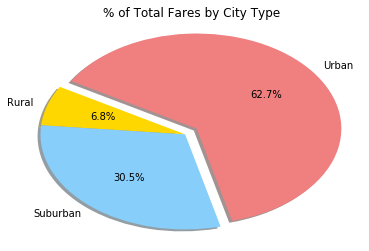

In [9]:
# Calculate Type Percents
urban_fares = urban_data['fare'].sum()/combined_data['fare'].sum()*100
suburban_fares = suburban_data['fare'].sum()/combined_data['fare'].sum()*100
rural_fares = rural_data['fare'].sum()/combined_data['fare'].sum()*100

# Build Pie Chart

types = ["Rural", "Suburban","Urban"]
percentages = [rural_fares, suburban_fares,urban_fares]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,.1)

plt.pie(percentages, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150,wedgeprops = {'linewidth': 0})

plt.title("% of Total Fares by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("images/Pyber_Fares_By_City_Type.png")
plt.show()

## Total Rides by City Type

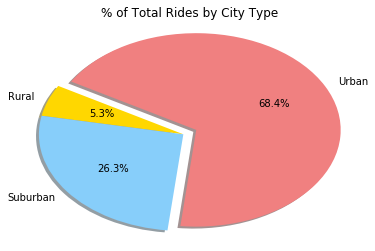

In [10]:
# Calculate Ride Percents
urban_rides = urban_data['type'].count()/combined_data['type'].count()*100
suburban_rides = suburban_data['type'].count()/combined_data['type'].count()*100
rural_rides = rural_data['type'].count()/combined_data['type'].count()*100


# Build Pie Chart

types = ["Rural", "Suburban","Urban"]
percentages = [rural_rides, suburban_rides,urban_rides]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,.1)

plt.pie(percentages, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150,wedgeprops = {'linewidth': 0})

plt.title("% of Total Rides by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("images/Pyber_Rides_By_City_Type.png")
plt.show()

## Total Drivers by City Type

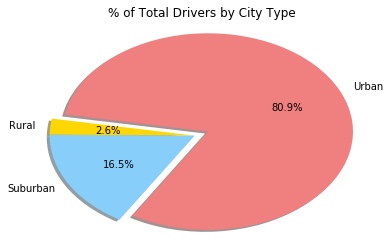

In [11]:
# Calculate Driver Percents
total_drivers = city_data['driver_count'].sum()

urban_percentage_data = city_data.loc[city_data['type']=="Urban"]
suburban_percentage_data =  city_data.loc[city_data['type']=="Suburban"]
rural_percentage_data = city_data.loc[city_data['type']=="Rural"]

urban_percentage = urban_percentage_data['driver_count'].sum()/total_drivers * 100
suburban_percentage = suburban_percentage_data['driver_count'].sum()/total_drivers * 100
rural_percentage = rural_percentage_data['driver_count'].sum()/total_drivers * 100

# Build Pie Charts
types = ["Rural", "Suburban","Urban"]
percentages = [rural_percentage, suburban_percentage,urban_percentage]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,.1)

plt.pie(percentages, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170,wedgeprops = {'linewidth': 0})

plt.title("% of Total Drivers by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("images/Pyber_Drivers_By_City_Type.png")
plt.show()